# Iterative EndPoint Fit Algorithm

## Dependencies

1. NumPy
2. SciPy
3. MatplotLib
4. Pandas
5. Math

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Representasi Titik

$P=\{x,y\}$

In [2]:
p0 = np.array([10,5])

In [3]:
p0

array([10,  5])

## Representasi Garis

$\overleftrightarrow{AB}$

$L = \{P_0,..,P_n\}$


In [4]:
p0 = np.array([0,0])
p1 = np.array([10,10])
l0 = np.array([p0,p1])

In [5]:
l0

array([[ 0,  0],
       [10, 10]])

## Dataset Titik

In [6]:
p0 = np.array([0,0])
p1 = np.array([2,2])
p2 = np.array([3,4])
p3 = np.array([4,10])

dP = np.array([p0,p1,p2,p3])

In [7]:
dP

array([[ 0,  0],
       [ 2,  2],
       [ 3,  4],
       [ 4, 10]])

In [8]:
# Menampilkan sumbu x dari dataset titik
dP[:4,:1] 

array([[0],
       [2],
       [3],
       [4]])

In [9]:
# Menampilkan sumbu y dari dataset titik
dP[:4,1:] 

array([[ 0],
       [ 2],
       [ 4],
       [10]])

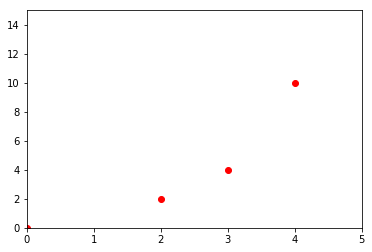

In [10]:
plt.plot(dP[:4,:1], dP[:4,1:], 'ro')
plt.axis([0, 5, 0, 15])
plt.show()

Mengambil nilai koordinat titik dari file csv

In [12]:
df = pd.read_csv('C:\Research\IEPF-Line-Extraction\Source-Code\dataset.csv')
dP = df.as_matrix()

In [13]:
dP

array([[  0,   0, 349],
       [  1,   0, 338],
       [  2,   0, 327],
       [  3,   0, 315],
       [  4,   0, 304],
       [  5,   0, 292],
       [  6,   0, 281],
       [  7,   0, 269],
       [  8,   0, 256],
       [  9,   0, 244],
       [ 10,   0, 231],
       [ 11,   0, 218],
       [ 12,   0, 204],
       [ 13,   0, 190],
       [ 14,   0, 176],
       [ 15,   0, 160],
       [ 16,   0, 144],
       [ 17,  18, 141],
       [ 18,  53, 152],
       [ 19,  69, 150],
       [ 20,  92, 155],
       [ 21, 113, 160],
       [ 22, 127, 161],
       [ 23, 145, 165],
       [ 24, 159, 168],
       [ 25, 176, 176],
       [ 26, 187, 177],
       [ 27, 195, 174],
       [ 28, 205, 176],
       [ 29, 215, 178],
       [ 30, 224, 179],
       [ 31, 233, 181],
       [ 32, 242, 184],
       [ 33, 250, 186],
       [ 34, 257, 186],
       [ 35, 265, 188],
       [ 36, 272, 192],
       [ 37, 279, 193],
       [ 38, 285, 195],
       [ 39, 292, 196],
       [ 40, 298, 197],
       [ 41, 303

In [14]:
dP = dP[:,1:]

In [15]:
dP

array([[  0, 349],
       [  0, 338],
       [  0, 327],
       [  0, 315],
       [  0, 304],
       [  0, 292],
       [  0, 281],
       [  0, 269],
       [  0, 256],
       [  0, 244],
       [  0, 231],
       [  0, 218],
       [  0, 204],
       [  0, 190],
       [  0, 176],
       [  0, 160],
       [  0, 144],
       [ 18, 141],
       [ 53, 152],
       [ 69, 150],
       [ 92, 155],
       [113, 160],
       [127, 161],
       [145, 165],
       [159, 168],
       [176, 176],
       [187, 177],
       [195, 174],
       [205, 176],
       [215, 178],
       [224, 179],
       [233, 181],
       [242, 184],
       [250, 186],
       [257, 186],
       [265, 188],
       [272, 192],
       [279, 193],
       [285, 195],
       [292, 196],
       [298, 197],
       [303, 198],
       [309, 201],
       [315, 203],
       [320, 205],
       [325, 206],
       [330, 208],
       [335, 210],
       [341, 210],
       [346, 212],
       [351, 214],
       [356, 216],
       [361,

In [16]:
# Mencari total jumlah dataset point
totP,_ = dP.shape

In [17]:
totP

89

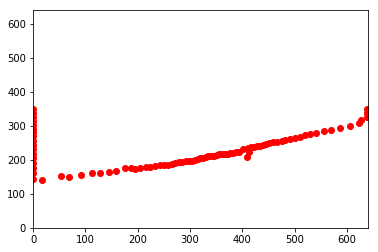

In [18]:
plt.plot(dP[:totP,:1], dP[:totP,1:], 'ro')
plt.axis([0, 640, 0, 640])
plt.show()

In [19]:
# Fungsi load dataset
# Input berupa file csv
# Output berupa dataset point dalam bentuk kumpulan koordinat x,y
def csvToDatasetPoint(csvFile):
    df = pd.read_csv(csvFile)
    dP = df.as_matrix()
    dP = dP[:,1:]
    return dP

In [21]:
csvToDatasetPoint('C:\Research\IEPF-Line-Extraction\Source-Code\dataset.csv')

array([[  0, 349],
       [  0, 338],
       [  0, 327],
       [  0, 315],
       [  0, 304],
       [  0, 292],
       [  0, 281],
       [  0, 269],
       [  0, 256],
       [  0, 244],
       [  0, 231],
       [  0, 218],
       [  0, 204],
       [  0, 190],
       [  0, 176],
       [  0, 160],
       [  0, 144],
       [ 18, 141],
       [ 53, 152],
       [ 69, 150],
       [ 92, 155],
       [113, 160],
       [127, 161],
       [145, 165],
       [159, 168],
       [176, 176],
       [187, 177],
       [195, 174],
       [205, 176],
       [215, 178],
       [224, 179],
       [233, 181],
       [242, 184],
       [250, 186],
       [257, 186],
       [265, 188],
       [272, 192],
       [279, 193],
       [285, 195],
       [292, 196],
       [298, 197],
       [303, 198],
       [309, 201],
       [315, 203],
       [320, 205],
       [325, 206],
       [330, 208],
       [335, 210],
       [341, 210],
       [346, 212],
       [351, 214],
       [356, 216],
       [361,

## Jarak antar titik
Fungsi untuk menghitung jarak antara dua titik

* Input : Koordinat titik A dan koordinat titik B

* Ouput : Jarak antara dua titik

In [22]:
def distancePointToPoint(p0, p1):
    return math.sqrt(((p1[0]-p0[0])*(p1[0]-p0[0])) + ((p1[1]-p0[1])*(p1[1]-p0[1])))

In [23]:
pointA = np.array([0,0])

In [24]:
pointB = np.array([10,20])

In [25]:
distancePointToPoint(pointA, pointB)

22.360679774997898

## Fungsi Garis

$y = mx + b$

Fungsi untuk mencari persamaan garis

* Input : Koordinat Titik 1 dan koordinat titik 2
* Output : Nilai m (gradient) dan b (constanta)

In [26]:
# Hanya berlaku jika garis memiliki kemiringan
def lineFunction(l0):
#     Tipe garis 0 = miring, 1 = gradien = 0, -1 gradien tak hingga
    ltype = 0
#     Jika delta x = 0
    if l0[1,0] - l0[0,0] == 0:
        ltype = -1
    elif l0[1,1] - l0[0,1] == 0:
        ltype = 1
    else:
        ltype = 0

    if ltype == 0:
        m = float(l0[1,1] - l0[0,1]) / float(l0[1,0] - l0[0,0])
        b = float(l0[0,1] - m * l0[0,0])
    else:
        m = 0
        b = 0
        
    return ltype, m, b

In [27]:
p0 = np.array([10,0])
p1 = np.array([0,0])

l0 = np.array([p0,p1])

lineFunction(l0)

(1, 0, 0)

Convert y=mx+b to ax+bx+c=0
https://www.youtube.com/watch?v=h13wI_gi4GA

In [28]:
def convertToABC(ltype, m, b):
    if ltype == -1:
        _a = 0.00
        _b = 0.00
        _c = 0.00
    elif ltype == 1:
        _a = 0.00
        _b = 0.00
        _c = 0.00
    else:
        _a = m * -1.00
        _b = 1.00
        _c = b * -1.00
    return _a, _b, _c

In [29]:
a, b, c = convertToABC(0, 2, 1.6)

In [30]:
a

-2.0

In [31]:
b

1.0

In [32]:
c

-1.6

## Jarak titik ke garis
https://www.youtube.com/watch?v=h13wI_gi4GA

$d = |ax + by + c| / $

In [33]:
def distancePointToLine(p0, l0):
#     Jika delta x = 0
#     if l?[1,0] - l0[0,0] != 0:
    ltype, m, b = lineFunction(l0)
#     print ltype
    _a, _b, _c = convertToABC(ltype, m, b)
    d = 0
    if ltype == -1:
        d = abs(p0[0] - l0[0,0])
    elif ltype == 1:
        d = abs(p0[1] - l0[0,1])
    else:
        d = abs(_a * p0[0] + _b * p0[1] + _c) / math.sqrt(_a * _a + _b * _b)

    return d
    

In [34]:
# Example

p0 = np.array([2,1])
l0 = np.array([[0,100],[10,10]])

distancePointToLine(p0, l0)

8.94495361206257

## Iterative End Point Fit

### Split

Input berupa dataset point
Ouput berupa cluster point

In [48]:
def split(threshold, dP, eP):
#     print 'Masuk IEPF'
    maxD = 0
    breakPointIndex = -1

    totalPoint, _ = dP.shape
    totalEndPoint = eP.size
    
    for i in range(0,totalEndPoint-1):
        eP0 = eP[i]
        ePN = eP[i+1] - 1 # Ini coba di cek lagi

        l0 = np.array([dP[eP0],dP[ePN]])

        for j in range(eP[i],eP[i+1]):
            tempD =  distancePointToLine(dP[j], l0)
            if tempD > threshold:
                if (tempD > maxD):
                    maxD = tempD
                    breakPointIndex = j
        
    if breakPointIndex != -1:
        eP = np.insert(eP, [totalEndPoint-1], breakPointIndex)
        eP = split(threshold, dP, eP)
        
    return eP    

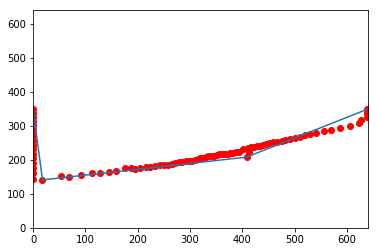

In [147]:
dP = csvToDatasetPoint('C:\Research\IEPF-Line-Extraction\Source-Code\dataset.csv')
totalP, _ = dP.shape

# print 'Jumlah Point'
# print jumlahPoint

p0 = np.array([dP[0,0],dP[0,1]])
p1 = np.array([dP[totalP-1,0],dP[totalP-1,1]])
eP = np.array([0,totalP-1])
# print p

# a = e
# print p.size
eP = split(30, dP, eP)
totalEP = eP.size
# print eP.size
# X
# print dP[eP[0:4],:1] 
# print dP[eP[0:4],1:] 
plt.plot(dP[:totalP,:1], dP[:totalP,1:], 'ro')
plt.plot(dP[eP[0:totalEP],:1], dP[eP[0:totalEP],1:])
plt.axis([0, 640, 0, 640])
plt.show()


### Merge

Input berupa minimal panjang, dataset point dan endpoint awal
Outpu berupa endpoint yang sudah di merge

In [148]:
def merge(threshold, dP, eP):
#     print dP
    totalEndPoint = eP.size
#     print totalEndPoint-1
    # Jangan pakai in range
    i = 0
    while i < totalEndPoint-1 :
#     for i in range(0, totalEndPoint-1):
        print 'I = {}'.format(i)
        print 'eP Index = {}'.format(i)
        print 'totalEndPoint = {}'.format(totalEndPoint)
        eP0 = eP[i]
        ePN = eP[i+1] 
        
        print 'eP0 = {}'.format(eP0)
        print 'ePN = {}'.format(ePN)
        tempD = distancePointToPoint(dP[eP0], dP[ePN])
        print tempD
        # Jika jarak antara kedua titik kurang dari threshold
        if tempD < threshold:
            # Delete endpoint
            eP = np.delete(eP,[i+1])
#             totalEndPoint = totalEndPoint - 2
            # Update latest totalEndPoint
            totalEndPoint = eP.size
            print 'Merge'
        i = i + 1
        print '---------------------'
    return eP

In [149]:
print eP

[ 0 17 59 88]


In [150]:
eP = merge(200, dP, eP)

I = 0
eP Index = 0
totalEndPoint = 4
eP0 = 0
ePN = 17
208.777393412
---------------------
I = 1
eP Index = 1
totalEndPoint = 4
eP0 = 17
ePN = 59
395.71328004
---------------------
I = 2
eP Index = 2
totalEndPoint = 4
eP0 = 59
ePN = 88
270.632592272
---------------------


In [151]:
eP

array([ 0, 17, 59, 88])

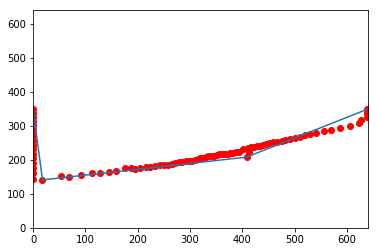

In [152]:
plt.plot(dP[:totalP,:1], dP[:totalP,1:], 'ro')
plt.plot(dP[eP[0:totalEP],:1], dP[eP[0:totalEP],1:])
plt.axis([0, 640, 0, 640])
plt.show()

## Least Square Method

In [ ]:
import numpy as np

In [ ]:
a = np.array([[2,3],[3,4]])

In [ ]:
a

In [ ]:
a = np.array([np.array([[2,3],[3,4]]),np.array([[4,5],[3,4],[5,6]])])

In [ ]:
a

In [ ]:
a[0]

In [ ]:
a[1]

In [ ]:
a[0,1]

In [157]:
%%cmd

dir

Microsoft Windows [Version 10.0.16299.309]
(c) 2017 Microsoft Corporation. All rights reserved.

C:\Research\ResearchNotes\Iterative_EndPoint_Fit>
C:\Research\ResearchNotes\Iterative_EndPoint_Fit>dir
 Volume in drive C has no label.
 Volume Serial Number is 6A45-D552

 Directory of C:\Research\ResearchNotes\Iterative_EndPoint_Fit

02/04/2018  14:19    <DIR>          .
02/04/2018  14:19    <DIR>          ..
01/04/2018  23:01    <DIR>          .ipynb_checkpoints
02/04/2018  14:19            67.849 Iterative_EndPoint_Fit.ipynb
               1 File(s)         67.849 bytes
               3 Dir(s)  47.895.171.072 bytes free

C:\Research\ResearchNotes\Iterative_EndPoint_Fit>